In [43]:
! pip install scikit-bio

In [44]:
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from datetime import datetime
import skbio.stats.composition as cp
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from skbio.diversity.alpha import *
%matplotlib inline

# Read data

In [45]:
start = datetime.now()
OTUs = np.load('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_uniquified.npy')
#OTUs = np.load('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU.npy')
end = datetime.now()
(start -end).total_seconds()

-0.484022

In [46]:
start = datetime.now()
f = open('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_names.txt')
OTU_names = f.read()
f.close()
OTU_names = OTU_names.split('\n')[:-1]
OTU_names.sort()
end = datetime.now()
(start -end).total_seconds()

-0.048817

In [47]:
OTUs.shape

(8282, 4106)

In [48]:
num_OTUs = np.count_nonzero(OTUs,axis=1)

In [49]:
OTUs[1,:].shape

(4106,)

In [50]:
shannon_OTUs = np.zeros(num_OTUs.shape)
simpson_OTUs = np.zeros(num_OTUs.shape)
gini_index_OTUs = np.zeros(num_OTUs.shape)

for i in range(OTUs.shape[0]):
    shannon_OTUs[i] = shannon(OTUs[i,:])
    simpson_OTUs[i] = simpson(OTUs[i,:])
    gini_index_OTUs[i] = gini_index(OTUs[i,:])

In [51]:
gini_index_OTUs.shape

(8282,)

In [52]:
tem_select = []
for i in range(len(OTU_names)):
    if "unspecified" in OTU_names[i]:
        if OTU_names[i].endswith("unspecified"):
            tem_select.append(OTU_names[i])
    else:
        tem_select.append(OTU_names[i])
len(tem_select)


4106

In [53]:
age_cat = pd.read_csv('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_age_cat.txt',index_col=0)
bmi_cat = pd.read_csv('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_bmi_cat.txt',index_col=0)
race = pd.read_csv('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_race.txt',index_col=0)
sex = pd.read_csv('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_sex.txt',index_col=0)
alco_fre = pd.read_csv('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_alcohol_frequency.txt',index_col=0)

In [54]:
f = open('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_names.txt', 'r')
OTU_names = f.read().split('\n')
f.close()
OTU_names = sorted(OTU_names)

In [55]:
select_name = []

for i in range(len(OTU_names)):
    if OTU_names[i].endswith('unspecified'):
        select_name.append(OTU_names[i])
    elif 'unspecified' not in OTU_names[i]:
        select_name.append(OTU_names[i])
len(select_name)

4107

In [56]:
#OTUs = cp.multiplicative_replacement(OTUs)    # zero replacement
#OTUs = cp.clr(OTUs)    # log transform

# Data transformation

In [57]:
age_cat = np.array(age_cat.age_cat)
bmi_cat = np.array(bmi_cat.bmi_cat)
race = np.array(race.race)
sex = np.array(sex.sex)
alco_fre = np.array(alco_fre.alcohol_frequency)
sex

array(['female', 'male', 'female', ..., 'male', 'male', 'female'],
      dtype=object)

In [58]:
# change the character to number 

alco_dic = {
    1: 'Daily',
    5: 'Never',
    3: 'Occasionally (1-2 times/week)',
    2: "Regularly (3-5 times/week)",
    4: "Rarely (a few times/month)"
}

alco_fre[alco_fre=='Daily'] = 1
alco_fre[alco_fre=='Never'] = 5
alco_fre[alco_fre=='Occasionally (1-2 times/week)'] = 3
alco_fre[alco_fre=='Regularly (3-5 times/week)'] = 2
alco_fre[alco_fre=='Rarely (a few times/month)'] = 4

In [59]:
# change the character to number 

sex_dic = {
    1: 'male',
    2: 'female',
    3: 'other'
}

sex[sex=='male'] = 1
sex[sex=='female'] = 2
sex[sex=='other'] = 3

In [60]:
# change the age cat into number

age_dic = {
    0: 'child',
    1: 'teen',
    2: '20s',
    3: '30s',
    4: "40s",
    5: "50s",
    6: "60s",
    7: "70+"
}

age_cat[age_cat=='child'] = 0
age_cat[age_cat=='teen'] = 1
age_cat[age_cat=='20s'] = 2
age_cat[age_cat=='30s'] = 3
age_cat[age_cat=='40s'] = 4
age_cat[age_cat=='50s'] = 5
age_cat[age_cat=='60s'] = 6
age_cat[age_cat=='70+'] = 7

In [61]:
# change the bmi cat into number

bmi_dic = {
    1:'Normal',
    2:'Obese',
    3:'Overweight',
    4:"Underweight"
}

bmi_cat[bmi_cat=='Normal'] = 1
bmi_cat[bmi_cat=='Obese'] = 2
bmi_cat[bmi_cat=='Overweight'] = 3
bmi_cat[bmi_cat=='Underweight'] = 4

In [62]:
# change the bmi cat into number
race_dic = {
    1:'African American',
    2:'Asian or Pacific Islander',
    3:'Caucasian',
    4:'Hispanic',
    5:'Other'
}
race[race=='African American'] = 1
race[race=='Asian or Pacific Islander'] = 2
race[race=='Caucasian'] = 3
race[race=='Hispanic'] = 4
race[race=='Other'] = 5

In [63]:
BMI = np.loadtxt('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/provided_OTU_bmi.txt', delimiter=',', skiprows=1, usecols=1)
BMI.shape

(8282,)

In [64]:
select_name[1]
select_name = select_name[1:]

In [65]:
for i in range(len(select_name)):
    select_name[i] = select_name[i].split('|')

select_name = np.array(select_name)

In [66]:
np.unique(select_name[:,1])

array(['p__Acidobacteria', 'p__Actinobacteria', 'p__Armatimonadetes',
       'p__BRC1', 'p__Bacteria', 'p__Bacteroidetes', 'p__Caldiserica',
       'p__Chlorobi', 'p__Chloroflexi', 'p__Crenarchaeota',
       'p__Cyanobacteria', 'p__Deferribacteres', 'p__Elusimicrobia',
       'p__Euryarchaeota', 'p__FBP', 'p__Firmicutes', 'p__Fusobacteria',
       'p__GN02', 'p__Gemmatimonadetes', 'p__Lentisphaerae', 'p__NKB19',
       'p__Nitrospirae', 'p__OD1', 'p__OP11', 'p__OP3', 'p__OP8',
       'p__Parvarchaeota', 'p__Planctomycetes', 'p__Proteobacteria',
       'p__Spirochaetes', 'p__Synergistetes', 'p__TM6', 'p__TM7',
       'p__Tenericutes', 'p__Thermi', 'p__Verrucomicrobia', 'p__WPS-2'],
      dtype='<U43')

In [67]:
np.unique(select_name[:,3])

array(['o__0319-7L14', 'o__3BR-5F', 'o__A89', 'o__AF420338', 'o__AKYG885',
       'o__Acholeplasmatales', 'o__Acidimicrobiales', 'o__Acidobacteria',
       'o__Acidobacteria-2', 'o__Acidobacteria-5', 'o__Acidobacteriales',
       'o__Actinobacteria', 'o__Actinomycetales', 'o__Aeromonadales',
       'o__Alphaproteobacteria', 'o__Alteromonadales', 'o__Anaerolineae',
       'o__Anaerolineales', 'o__Anaeroplasmatales', 'o__Armatimonadales',
       'o__B07_WMSP1', 'o__B97', 'o__BD1-5', 'o__BD4-9', 'o__BD7-3',
       'o__Bacillales', 'o__Bacilli', 'o__Bacteria', 'o__Bacteroidales',
       'o__Bacteroidetes', 'o__Bdellovibrionales',
       'o__Betaproteobacteria', 'o__Bifidobacteriales', 'o__Bljii12',
       'o__Burkholderiales', 'o__C20', 'o__CCU21', 'o__CW040',
       'o__Caldilineales', 'o__Campylobacterales', 'o__Cardiobacteriales',
       'o__Caulobacterales', 'o__Cenarchaeales', 'o__Cerasicoccales',
       'o__Chlorobi', 'o__Chloroflexales', 'o__Chloroflexi',
       'o__Chlorophyta', 'o

In [68]:
np.unique(select_name[:,2])

array(['c__3BR-5F', 'c__4C0d-2', 'c__Acidimicrobiia', 'c__Acidobacteria',
       'c__Acidobacteria-2', 'c__Acidobacteria-5', 'c__Acidobacteria-6',
       'c__Acidobacteriia', 'c__Actinobacteria', 'c__Alphaproteobacteria',
       'c__Anaerolineae', 'c__Armatimonadia', 'c__BD1-5', 'c__BD4-9',
       'c__BSV26', 'c__Bacilli', 'c__Bacteria', 'c__Bacteroidetes',
       'c__Bacteroidia', 'c__Betaproteobacteria', 'c__Bljii12',
       'c__Chloracidobacteria', 'c__Chlorobi', 'c__Chloroflexi',
       'c__Chloroplast', 'c__Clostridia', 'c__Coriobacteriia',
       'c__Cyanobacteria', 'c__Cytophagia', 'c__Deferribacteres',
       'c__Deinococci', 'c__Deltaproteobacteria', 'c__Ellin6529',
       'c__Elusimicrobia', 'c__Endomicrobia', 'c__Epsilonproteobacteria',
       'c__Erysipelotrichi', 'c__Euryarchaeota', 'c__FBP',
       'c__Fimbriimonadia', 'c__Firmicutes', 'c__Flavobacteriia',
       'c__Fusobacteriia', 'c__GN05', 'c__Gammaproteobacteria',
       'c__Gemm-1', 'c__Gemm-2', 'c__Gemm-3', 'c__Gem

In [69]:
len(np.unique(select_name[:,2]))

111

In [70]:
len(np.unique(select_name[:,3]))

225

In [71]:
np.unique(select_name[:,0])

array(['k__Archaea', 'k__Bacteria'], dtype='<U43')

In [72]:
len(np.unique(select_name[:,5]))

867

In [73]:
genus_name = np.unique(select_name[:,5])

In [74]:
select_name=='g__0319-7L14'

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [75]:
np.sum(OTUs[:,select_name[:,5]=='g__Akkermansia'],axis=1).shape

(8282,)

In [76]:
g_OTUs = []
g_OTUs_names = []
total = np.sum(OTUs)
for i in range(len(genus_name)):
    tem_OTU = np.sum(OTUs[:,select_name[:,5]==genus_name[i]],axis=1)
    if np.sum(tem_OTU)>0.001*total:
        g_OTUs.append(tem_OTU)
        g_OTUs_names.append(genus_name[i])

In [77]:
np.sum(g_OTUs,axis=1)

array([  59.68719512,  182.39539721,    8.936275  ,   16.33554546,
          9.96244907,   24.1010142 ,   21.0195683 , 2198.26545699,
        107.60457688,   19.59213236,  219.46569456,   11.11852672,
         26.01562969,   14.08502779,   51.61193784,  377.67095557,
         23.07368284,   13.23475373,    9.85512675,   11.4449252 ,
         61.52312433,   98.96821096,    8.31210922,   34.55863033,
         10.55645643,    8.32797926,   63.95594924,   39.48399265,
         24.96398866,   54.39024797,   23.429808  ,  627.81600566,
         15.9190285 ,   17.27469904,   17.64466846,  106.51664327,
        689.39015812,   10.80571713,   23.00763441,   10.02759706,
         12.84097084,   12.32665982,   54.9067118 ,  230.14748228,
          9.44942917,   49.26058509,   65.0794991 ,    9.87781419,
        377.94917941,   41.27525782,   65.59243352,  256.20591463,
         77.89737486,  771.49088957,  254.93887571,  148.52401687,
         42.10456885,   38.3338546 ,   36.79351087,   27.47552

In [78]:
#np.save('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/g_array',g_OTUs)

In [79]:
#np.savetxt('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/g_array.txt',g_OTUs)

In [80]:
#f = open('/content/drive/MyDrive/class/STAT542/project/OUT_all_provided/g_array_name', 'w')
#for i in range(len(g_OTUs_names)):
#    f.write('%s/n'%(g_OTUs_names[i]))
#f.close()

In [81]:
g_OTUs=np.array(g_OTUs)
g_OTUs.shape

(63, 8282)

In [82]:
g_OTUs = np.transpose(g_OTUs)

In [83]:
g_OTUs.shape

(8282, 63)

In [84]:
OTUs.shape

(8282, 4106)

# data visualization
    num_OTUs: oberved OTUs
    shannon_OTUs:
    shannon_OTUs
    simpson_OTUs
    gini_index_OTUs

In [ ]:
mean_num_OTUs

[63.54641629198625, 63.74332740213523]

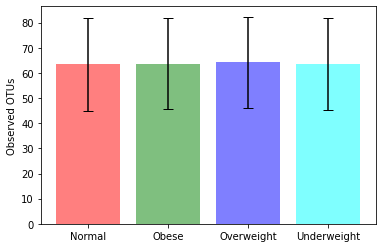

In [ ]:
mean_num_OTUs = []
std_num_OTUs = []
for i in range(1,5):
    tem_num_OTUs = num_OTUs[bmi_cat==i]
    mean_num_OTUs.append(tem_num_OTUs.mean())
    std_num_OTUs.append(tem_num_OTUs.std())

plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.bar(range(1,5), mean_num_OTUs, color=['red', 'green', 'blue', 'cyan'], alpha=0.5,
        yerr=std_num_OTUs,capsize=5)


plt.xticks([1,2,3,4],[bmi_dic[1],bmi_dic[2],bmi_dic[3],bmi_dic[4]])
#plt.legend()

plt.ylabel('Observed OTUs')
plt.axis('tight')
#plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/Observed_OTUs')

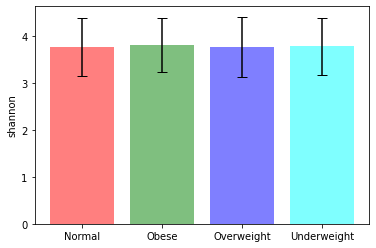

In [ ]:
mean_shannon_OTUs = []
std_shannon_OTUs = []
for i in range(1,5):
    tem_shannon_OTUs = shannon_OTUs[bmi_cat==i]
    mean_shannon_OTUs.append(tem_shannon_OTUs.mean())
    std_shannon_OTUs.append(tem_shannon_OTUs.std())

plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.bar(range(1,5), mean_shannon_OTUs, color=['red', 'green', 'blue', 'cyan'], alpha=0.5,
        yerr=std_shannon_OTUs,capsize=5)

plt.xticks([1,2,3,4],[bmi_dic[1],bmi_dic[2],bmi_dic[3],bmi_dic[4]])
#plt.legend()

plt.ylabel('shannon')
plt.axis('tight')
#plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/shannon')

In [ ]:
mean_simpson_OTUs

[0.8511415412057699, 0.8514747759064462]

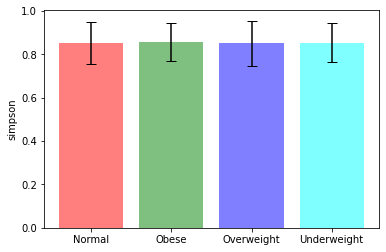

In [ ]:
mean_simpson_OTUs = []
std_simpson_OTUs = []
for i in range(1,5):
    tem_simpson_OTUs = simpson_OTUs[bmi_cat==i]
    mean_simpson_OTUs.append(tem_simpson_OTUs.mean())
    std_simpson_OTUs.append(tem_simpson_OTUs.std())

plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.bar(range(1,5), mean_simpson_OTUs, color=['red', 'green', 'blue', 'cyan'], alpha=0.5,
        yerr=std_simpson_OTUs,capsize=5)

plt.xticks([1,2,3,4],[bmi_dic[1],bmi_dic[2],bmi_dic[3],bmi_dic[4]])
#plt.legend()

plt.ylabel('simpson')
plt.axis('tight')
#plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/simpson')

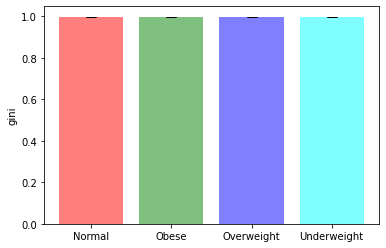

In [ ]:
mean_gini_index_OTUs = []
std_gini_index_OTUs = []
for i in range(1,5):
    tem_gini_index_OTUs = gini_index_OTUs[bmi_cat==i]
    mean_gini_index_OTUs.append(tem_gini_index_OTUs.mean())
    std_gini_index_OTUs.append(tem_gini_index_OTUs.std())

plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.bar(range(1,5), mean_gini_index_OTUs, color=['red', 'green', 'blue', 'cyan'], alpha=0.5,
        yerr=std_gini_index_OTUs,capsize=5)

plt.xticks([1,2,3,4],[bmi_dic[1],bmi_dic[2],bmi_dic[3],bmi_dic[4]])
#plt.legend()

plt.ylabel('gini')
plt.axis('tight')
#plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/gini')

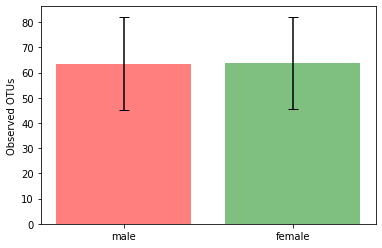

In [ ]:
mean_num_OTUs = []
std_num_OTUs = []
for i in range(1,3):
    tem_num_OTUs = num_OTUs[sex==i]
    mean_num_OTUs.append(tem_num_OTUs.mean())
    std_num_OTUs.append(tem_num_OTUs.std())

plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.bar(range(1,3), mean_num_OTUs, color=['red', 'green'], alpha=0.5,
        yerr=std_num_OTUs,capsize=5)


plt.xticks([1,2],[sex_dic[1],sex_dic[2]])
#plt.legend()

plt.ylabel('Observed OTUs')
plt.axis('tight')
#plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/Observed_OTUs_sex')

In [ ]:
mean_num_OTUs = []
std_num_OTUs = []
for i in range(1,3):
    tem_num_OTUs = num_OTUs[sex==i]
    mean_num_OTUs.append(tem_num_OTUs.mean())
    std_num_OTUs.append(tem_num_OTUs.std())

plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.bar(range(1,3), mean_num_OTUs, color=['red', 'green'], alpha=0.5,
        yerr=std_num_OTUs,capsize=5)


plt.xticks([1,2],[sex_dic[1],sex_dic[2]])
#plt.legend()

plt.ylabel('Observed OTUs')
plt.axis('tight')
#plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/Observed_OTUs_sex')

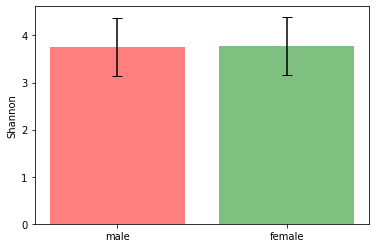

In [ ]:
mean_shannon_OTUs = []
std_shannon_OTUs = []
for i in range(1,3):
    tem_shannon_OTUs = shannon_OTUs[sex==i]
    mean_shannon_OTUs.append(tem_shannon_OTUs.mean())
    std_shannon_OTUs.append(tem_shannon_OTUs.std())

plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.bar(range(1,3), mean_shannon_OTUs, color=['red', 'green'], alpha=0.5,
        yerr=std_shannon_OTUs,capsize=5)


plt.xticks([1,2],[sex_dic[1],sex_dic[2]])
#plt.legend()

plt.ylabel('Shannon')
plt.axis('tight')
#plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/shannon_sex')

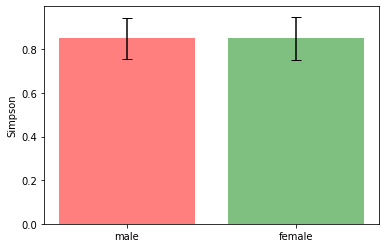

In [ ]:
mean_simpson_OTUs = []
std_simpson_OTUs = []
for i in range(1,3):
    tem_simpson_OTUs = simpson_OTUs[sex==i]
    mean_simpson_OTUs.append(tem_simpson_OTUs.mean())
    std_simpson_OTUs.append(tem_simpson_OTUs.std())

plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.bar(range(1,3), mean_simpson_OTUs, color=['red', 'green'], alpha=0.5,
        yerr=std_simpson_OTUs,capsize=5)


plt.xticks([1,2],[sex_dic[1],sex_dic[2]])
#plt.legend()

plt.ylabel('Simpson')
plt.axis('tight')
#plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/simpson_sex')

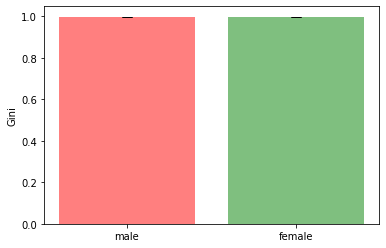

In [ ]:
mean_gini_index_OTUs = []
std_gini_index_OTUs = []
for i in range(1,3):
    tem_gini_index_OTUs = gini_index_OTUs[sex==i]
    mean_gini_index_OTUs.append(tem_gini_index_OTUs.mean())
    std_gini_index_OTUs.append(tem_gini_index_OTUs.std())

plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.bar(range(1,3), mean_gini_index_OTUs, color=['red', 'green'], alpha=0.5,
        yerr=std_gini_index_OTUs,capsize=5)


plt.xticks([1,2],[sex_dic[1],sex_dic[2]])
#plt.legend()

plt.ylabel('Gini')
plt.axis('tight')
#plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/gini_sex')

# Classification

In [87]:
g_OTUs = cp.multiplicative_replacement(g_OTUs)    # zero replacement
g_OTUs = cp.clr(g_OTUs)    # log transform
g_OTUs

array([[-1.84489366,  1.96847186, -1.84489366, ..., -1.84489366,
        -2.27525058,  1.75010132],
       [-1.41014611,  2.79441302, -1.41014611, ..., -0.36258765,
        -0.83259117, -1.41014611],
       [-1.46053211, -1.46053211, -1.46053211, ..., -1.46053211,
        -1.46053211, -1.46053211],
       ...,
       [-2.73016472, -1.02541654, -1.89384915, ..., -1.89384915,
        -1.89384915, -2.3246993 ],
       [-1.86713817,  2.00142143, -1.86713817, ..., -1.86713817,
        -1.86713817, -1.86713817],
       [-1.85896939, -1.85896939, -1.85896939, ..., -1.85896939,
        -0.91105814,  0.82354286]])

In [88]:
# select data that the race is Caucasian
select_OTUs = g_OTUs[race==3,]
select_BMI = BMI[race==3]
select_age_cat = age_cat[race==3]
select_bmi_cat = bmi_cat[race==3]
select_sex = sex[race==3]
select_alco = alco_fre[race==3]

select_num_OTUs = num_OTUs[race==3,]
select_shannon_OTUs = shannon_OTUs[race==3,]
select_simpson_OTUs = simpson_OTUs[race==3,]
select_gini_index_OTUs = gini_index_OTUs[race==3,]


select_OTUs.shape

(7444, 63)

In [89]:
n_age = []
for i in range(8):
    n_age.append(select_OTUs[select_age_cat==i,].shape[0])
    print(select_OTUs[select_age_cat==i,].shape)

(271, 63)
(177, 63)
(612, 63)
(1308, 63)
(1465, 63)
(1581, 63)
(1504, 63)
(526, 63)


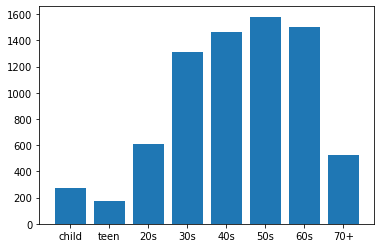

In [ ]:
plt.bar([0,1,2,3,4,5,6,7], n_age)
plt.xticks([0,1,2,3,4,5,6,7],[age_dic[0],age_dic[1],age_dic[2],age_dic[3],age_dic[4],age_dic[5],age_dic[6],age_dic[7]])
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bar_plot_age_Caucasian')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tempfile import TemporaryDirectory

from sklearn.neighbors import KNeighborsTransformer, KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


best mean training accurace in cross validataion:	 0.2291746641074856


0.2162041181736795

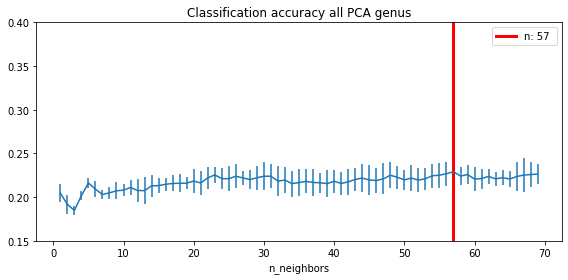

In [ ]:
# this is for all

tem_OTUs = select_OTUs
tem_alco = select_alco

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance genus (all)')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_variance_all', dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA genus")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_all', dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=1)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy all PCA genus')
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_pca_all',dpi=300)
#plt.clf()
#plt.close()

print('best mean training accurace in cross validataion:\t',np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
model.score(X_test,y_test.astype('int'))

best mean training accurace in cross validataion:	 0.2293666026871401


0.22470904207699194

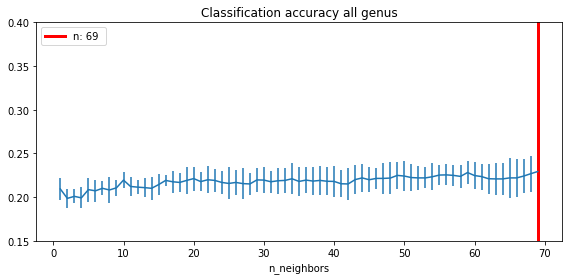

In [ ]:
# this is for all

tem_OTUs = select_OTUs
tem_alco = select_alco

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_alco, stratify=tem_alco, test_size=0.3, random_state=1)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy all genus')
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_all',dpi=300)
#plt.clf()
#plt.close()

print('best mean training accurace in cross validataion:\t',np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
model.score(X_test,y_test.astype('int'))

0.32677595628415307
0.2826086956521739


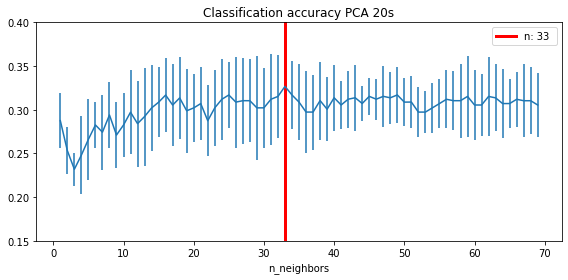

In [ ]:
# this is for 20s
tem_age = 2

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.title('PCA explained variance (20s)')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_variance_20s', dpi=300)

# pair-wise pca
plt.clf()
plt.close()

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_20s', dpi=300)

plt.clf()
plt.close()

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(tem_pca_mat, tem_alco.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes[0].set(xlabel='n_neighbors', title='Classification accuracy genus PCA %d0s'%tem_age)
axes[0].axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes[1].errorbar(x=n_neighbors_list, y=grid_model_pca.cv_results_['mean_fit_time'],
                 yerr=grid_model_pca.cv_results_['std_fit_time'], color='r')
axes[1].set(xlabel='n_neighbors', title='Fit time (with caching)')
fig.tight_layout()
axes[0].legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_pca_20s_times',dpi=300)

plt.clf()
plt.close()

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy PCA %d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()

print(np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))

0.3786320109439124
0.3423913043478261


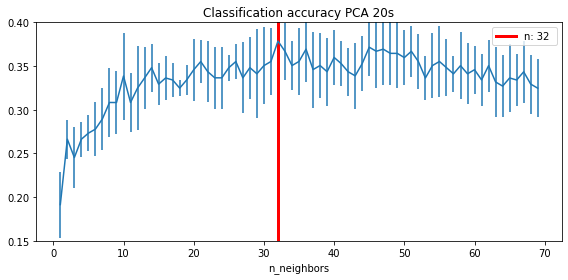

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model = GridSearchCV(full_model, param_grid)
    grid_model.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].errorbar(x=n_neighbors_list,
                 y=grid_model.cv_results_['mean_test_score'],
                 yerr=grid_model.cv_results_['std_test_score'])
axes[0].set(xlabel='n_neighbors', title='Classification accuracy %d0s'%tem_age)
axes[0].axvline(grid_model.best_index_+1, color='red', linewidth=3,
                label='best n: %d '%(grid_model.best_index_+1))

axes[1].errorbar(x=n_neighbors_list, y=grid_model.cv_results_['mean_fit_time'],
                 yerr=grid_model.cv_results_['std_fit_time'], color='r')

axes[1].set(xlabel='n_neighbors', title='Fit time (with caching)')
fig.tight_layout()
axes[0].legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_20s',dpi=300)

plt.clf()
plt.close()

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model.cv_results_['mean_test_score'],
                 yerr=grid_model.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy PCA %d0s'%tem_age)
axes.axvline(grid_model.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_%d0s_new'%tem_age,dpi=300)


print(np.max(grid_model.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))

0.28743169398907104
0.2595419847328244


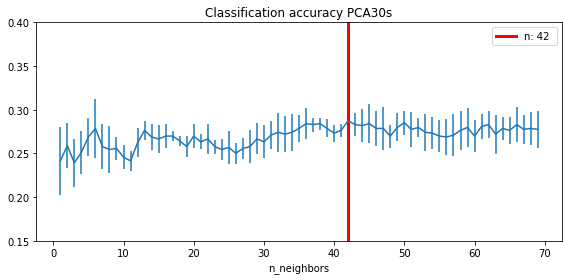

In [ ]:
# this is for 30s
tem_age = 3

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance genus(%d0s)'%tem_age)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_variance_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA genus(%d0s)"%tem_age)
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy PCA%d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()

print(np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))


0.31256830601092894
0.2900763358778626


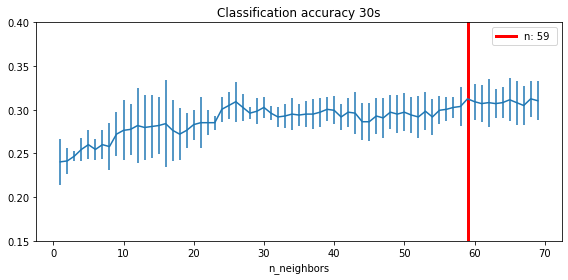

In [ ]:
# this is for 30s
tem_age = 3

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy %d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()
print(np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))


0.28097560975609753
0.2636363636363636


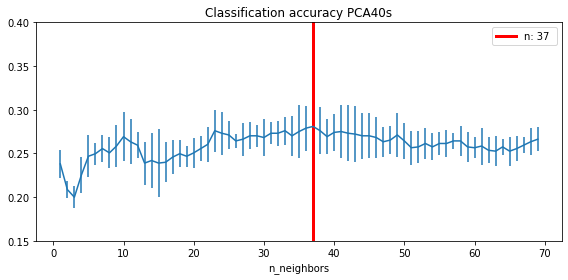

In [ ]:
# this is for 40s
tem_age = 4

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance genus(%d0s)'%tem_age)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_variance_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA genus(%d0s)"%tem_age)
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy PCA%d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()

print(np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))


0.25853658536585367
0.275


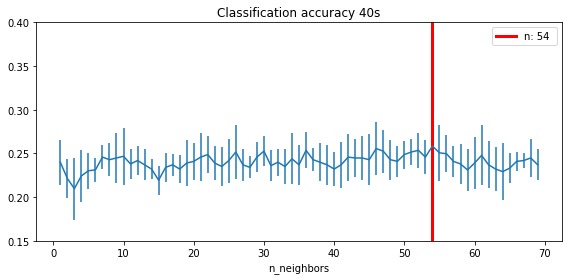

In [ ]:
# this is for 40s
tem_age = 4

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy %d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()
print(np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))


0.2549997961762668
0.23578947368421052


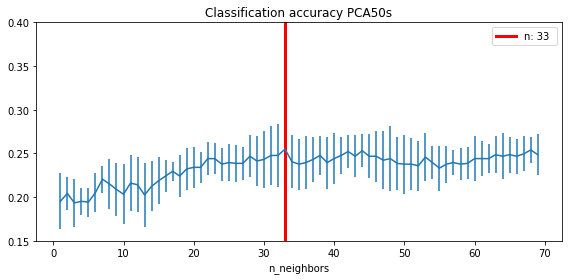

In [ ]:
# this is for 50s
tem_age = 5

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance genus(%d0s)'%tem_age)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_variance_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA genus(%d0s)"%tem_age)
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy PCA%d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()

print(np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))


In [ ]:
# this is for 50s
tem_age = 5

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy %d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()
print(np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))


0.22524937937260212
0.22566371681415928


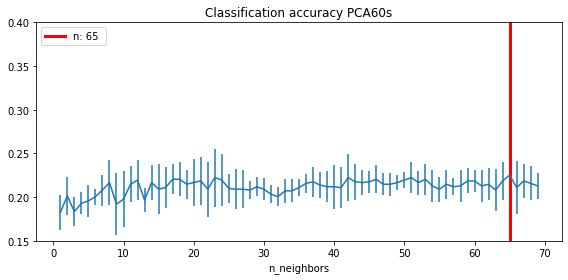

In [ ]:
# this is for 60s
tem_age = 6

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance genus(%d0s)'%tem_age)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_variance_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA genus(%d0s)"%tem_age)
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy PCA%d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()

print(np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))


0.24811554953735046
0.19247787610619468


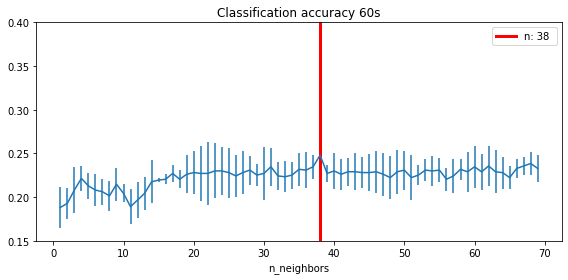

In [ ]:
# this is for 60s
tem_age = 6

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy %d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()
print(np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))


0.2771566086634579
0.26582278481012656


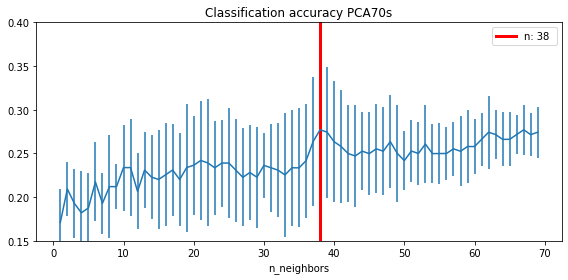

In [ ]:
# this is for 70s
tem_age = 7

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(tem_pca.explained_variance_ratio_)
plt.bar(x, height)
plt.ylim(0,0.7)
plt.title('PCA explained variance genus(%d0s)'%tem_age)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_variance_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA genus(%d0s)"%tem_age)
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = tem_pca_mat[:,i]
            pcy = tem_pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_%d0s'%tem_age, dpi=300)
plt.clf()
plt.close()

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy PCA%d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_pca_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()

print(np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))


0.271714179933358
0.24050632911392406


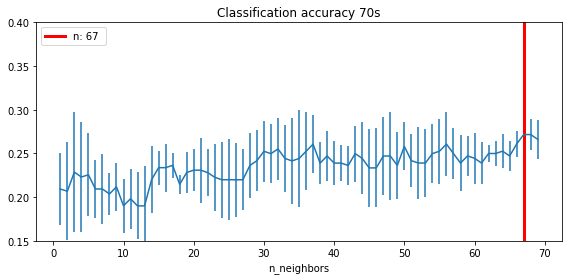

In [ ]:
# this is for 70s
tem_age = 7

tem_OTUs = select_OTUs[select_age_cat==tem_age]
tem_alco = select_alco[select_age_cat==tem_age]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)

n_neighbors_list = range(1,70)
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.
graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list),
                                    mode='distance')
classifier_model = KNeighborsClassifier(metric='precomputed')

# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[('graph', graph_model), ('classifier', classifier_model)],
        memory=tmpdir)

    param_grid = {'classifier__n_neighbors': n_neighbors_list}
    grid_model_pca = GridSearchCV(full_model, param_grid)
    grid_model_pca.fit(X_train, y_train.astype('int'))

# Plot the results of the grid search.
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.errorbar(x=n_neighbors_list,
                 y=grid_model_pca.cv_results_['mean_test_score'],
                 yerr=grid_model_pca.cv_results_['std_test_score'])
axes.set(xlabel='n_neighbors', title='Classification accuracy %d0s'%tem_age)
axes.axvline(grid_model_pca.best_index_+1, color='red', linewidth=3,
                label='n: %d '%(grid_model_pca.best_index_+1))
axes.set_ylim(0.15,0.4)
fig.tight_layout()
axes.legend()
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_knn_%d0s_new'%tem_age,dpi=300)
#plt.clf()
#plt.close()
print(np.max(grid_model_pca.cv_results_['mean_test_score']))
model = KNeighborsClassifier(n_neighbors=(grid_model_pca.best_index_+1))
model.fit(X_train,y_train.astype('int'))
# test accuracy
print(model.score(X_test,y_test.astype('int')))


#Classification using SVM

In [ ]:
from sklearn.svm import SVC 
from sklearn.model_selection import validation_curve

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 10.0min finished


{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


0.2403760071620412

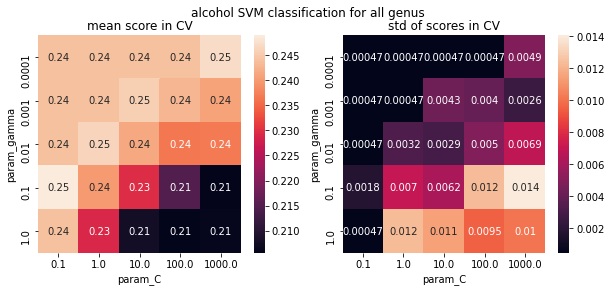

In [ ]:
# this is for all

tem_OTUs = select_OTUs
tem_alco = select_alco

scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('alcohol SVM classification for all genus')
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_svm_pca_all',dpi=300)
#plt.clf()
#plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

In [ ]:
def SVM(tem_age):
    # this is for 20s
    #tem_age = 2

    tem_OTUs = select_OTUs[select_age_cat==tem_age]
    tem_alco = select_alco[select_age_cat==tem_age]

    scaler = StandardScaler()
    scaler.fit(tem_OTUs)
    ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

    # PCA
    n_pc = 5
    tem_pca = PCA(n_components=n_pc)
    tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

    X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_alco, stratify=tem_alco, test_size=0.3, random_state=42)


    # defining parameter range 
    param_grid = {'C': [0.1, 1, 10, 100, 1000],  
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                'kernel': ['rbf']}  
    
    grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
    
    # fitting the model for grid search 
    grid.fit(X_train, y_train.astype('int')) 

    cv_resutls= pd.DataFrame(grid.cv_results_)

    fig,ax = plt.subplots(1,2,figsize=(10,4))

    fig.suptitle('alcohol SVM classification for %d0s genus'%tem_age)
    ax[0].set_title('mean score in CV')
    ax[1].set_title('std of scores in CV')
    sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
    sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

    plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_alcho_fre_svm_pca_%d0s'%tem_age,dpi=300)
    plt.clf()
    plt.close()

    print(grid.best_params_)
    # test score
    print(grid.score(X_test,y_test.astype('int')))

In [ ]:
for i in range(2,8):
    print(i)
    SVM(i)

2
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.32608695652173914
3
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.272264631043257
4
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.2818181818181818
5
{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.25684210526315787
6
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.25
7
{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.22784810126582278


# BMI classification

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
select_OTUs_male = select_OTUs[select_sex==1]
select_OTUs_female = select_OTUs[select_sex==2]

select_age_cat_male = select_age_cat[select_sex==1]
select_age_cat_female = select_age_cat[select_sex==2]

select_bmi_cat_male = select_bmi_cat[select_sex==1]
select_bmi_cat_female = select_bmi_cat[select_sex==2]

for i in range(0,8):
    print(i, select_OTUs_male[select_age_cat_male==i,].shape)

print('female')
for i in range(0,8):
    print(i, select_OTUs_female[select_age_cat_female==i,].shape)

0 (160, 63)
1 (94, 63)
2 (274, 63)
3 (614, 63)
4 (650, 63)
5 (648, 63)
6 (646, 63)
7 (282, 63)
female
0 (111, 63)
1 (83, 63)
2 (337, 63)
3 (692, 63)
4 (815, 63)
5 (933, 63)
6 (858, 63)
7 (243, 63)


In [ ]:
# this is for people>20s

tem_OTUs = select_OTUs[select_age_cat>=2]
tem_bmi_cat = select_bmi_cat[select_age_cat>=2]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)

param_grid = {'solver': ['svd']}  
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, refit = True, verbose = 1)
grid.fit(X_train, y_train.astype('int')) 


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None, param_grid={'solver': ['svd']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
grid.cv_results_['std_test_score']

array([0.00296712])

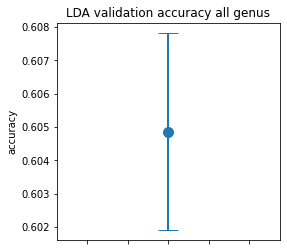

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.errorbar(x=1,
              y=grid.cv_results_['mean_test_score'],
              yerr=grid.cv_results_['std_test_score'],
              elinewidth=2,barsabove=True, marker='.', markersize=20, capsize=10)
axes.set_title('LDA validation accuracy all genus')
axes.set_xticklabels([])
axes.set_ylabel('accuracy')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bmi_cat_all_LDA',dpi=300)

In [ ]:
grid.score(X_test,y_test.astype('int'))

0.6055264411624584

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.06774559]),
 'mean_score_time': array([0.00109563]),
 'mean_test_score': array([0.60486106]),
 'param_solver': masked_array(data=['svd'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'solver': 'svd'}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.6]),
 'split1_test_score': array([0.60510204]),
 'split2_test_score': array([0.60674157]),
 'split3_test_score': array([0.60367722]),
 'split4_test_score': array([0.60878447]),
 'std_fit_time': array([0.00626063]),
 'std_score_time': array([6.83057537e-05]),
 'std_test_score': array([0.00296712])}

In [ ]:
scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('bmi SVM classification genus')
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bmi_cat_all_svm')
plt.clf()
plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


0.605050023820867

In [ ]:
grid.score(X_test,y_test.astype('int'))

0.605050023820867

In [ ]:
# this is for male children

tem_OTUs = select_OTUs_male[select_age_cat_male==0]
tem_bmi_cat = select_bmi_cat_male[select_age_cat_male==0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)

param_grid = {'shrinkage': np.linespace(0,1,10),
              'solver': ['lsqr']}  
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, refit = True, verbose = 1)
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

ValueError: ignored

In [ ]:
# this is for people>20s

tem_OTUs = select_OTUs_male[select_age_cat_male>=2]
tem_bmi_cat = select_bmi_cat_male[select_age_cat_male>=2]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)

param_grid = {'solver': ['svd']}  
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, refit = True, verbose = 1)
grid.fit(X_train, y_train.astype('int')) 


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None, param_grid={'solver': ['svd']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
grid.cv_results_['std_test_score']

array([0.0091123])

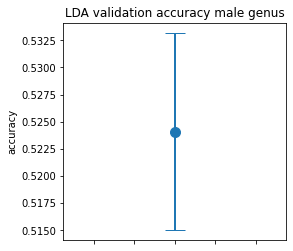

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.errorbar(x=1,
              y=grid.cv_results_['mean_test_score'],
              yerr=grid.cv_results_['std_test_score'],
              elinewidth=2,barsabove=True, marker='.', markersize=20, capsize=10)
axes.set_title('LDA validation accuracy male genus')
axes.set_xticklabels([])
axes.set_ylabel('accuracy')

fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bmi_cat_male_LDA',dpi=300)

In [ ]:
grid.score(X_test,y_test.astype('int'))

0.5219251336898396

In [ ]:
scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('bmi SVM classification male genus')
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bmi_cat_male_svm')
plt.clf()
plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


0.5540106951871657

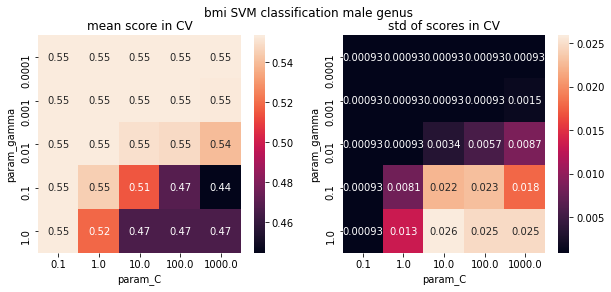

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('bmi SVM classification male genus')
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bmi_cat_male_SVM')

In [ ]:
# this is for male children

tem_OTUs = select_OTUs_female[select_age_cat_female==0]
tem_bmi_cat = select_bmi_cat_female[select_age_cat_female==0]

In [ ]:
# this is for people>20s

tem_OTUs = select_OTUs_female[select_age_cat_female>=2]
tem_bmi_cat = select_bmi_cat_female[select_age_cat_female>=2]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)

param_grid = {'solver': ['svd']}  
grid = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, refit = True, verbose = 1)
grid.fit(X_train, y_train.astype('int')) 


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None, param_grid={'solver': ['svd']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

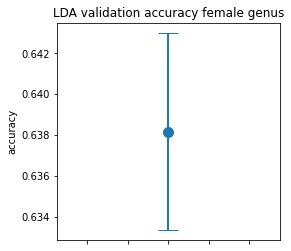

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(4, 4))
axes.errorbar(x=1,
              y=grid.cv_results_['mean_test_score'],
              yerr=grid.cv_results_['std_test_score'],
              elinewidth=2,barsabove=True, marker='.', markersize=20, capsize=10)
axes.set_title('LDA validation accuracy female genus')
axes.set_xticklabels([])
axes.set_ylabel('accuracy')

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bmi_cat_female_LDA',dpi=300)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.03557811]),
 'mean_score_time': array([0.00076518]),
 'mean_test_score': array([0.63817319]),
 'param_solver': masked_array(data=['svd'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'solver': 'svd'}],
 'rank_test_score': array([1], dtype=int32),
 'split0_test_score': array([0.63167587]),
 'split1_test_score': array([0.6335175]),
 'split2_test_score': array([0.64088398]),
 'split3_test_score': array([0.64456722]),
 'split4_test_score': array([0.6402214]),
 'std_fit_time': array([0.0042487]),
 'std_score_time': array([5.81466891e-05]),
 'std_test_score': array([0.00482323])}

In [ ]:
grid.score(X_test,y_test.astype('int'))

0.6434707903780069

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


0.6486254295532646

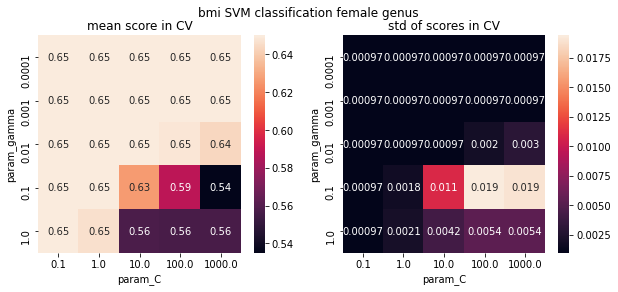

In [ ]:
scaler = StandardScaler()
scaler.fit(tem_OTUs)
ten_OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 5
tem_pca = PCA(n_components=n_pc)
tem_pca_mat = tem_pca.fit_transform(ten_OTUs_scale)    # project the original data into the PCA space

X_train, X_test, y_train, y_test = train_test_split(tem_pca_mat, tem_bmi_cat, stratify=tem_bmi_cat, test_size=0.3, random_state=42)


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train.astype('int')) 

cv_resutls= pd.DataFrame(grid.cv_results_)

plt.clf()
plt.close()
fig,ax = plt.subplots(1,2,figsize=(10,4))

fig.suptitle('bmi SVM classification female genus')
ax[0].set_title('mean score in CV')
ax[1].set_title('std of scores in CV')
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','mean_test_score'),annot=True, ax=ax[0])
sns.heatmap(cv_resutls.pivot('param_gamma','param_C','std_test_score'),annot=True, ax=ax[1])

fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bmi_cat_female_svm')
#plt.clf()
#plt.close()

print(grid.best_params_)
# test score
grid.score(X_test,y_test.astype('int'))

# Lasso


In [90]:
# lasso regression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC

In [91]:
select_OTUs_male = select_OTUs[select_sex==1]
select_OTUs_female = select_OTUs[select_sex==2]

select_age_cat_male = select_age_cat[select_sex==1]
select_age_cat_female = select_age_cat[select_sex==2]

select_BMI_male = select_BMI[select_sex==1]
select_BMI_female = select_BMI[select_sex==2]

for i in range(0,8):
    print(i, select_OTUs_male[select_age_cat_male==i,].shape)

print('female')
for i in range(0,8):
    print(i, select_OTUs_female[select_age_cat_female==i,].shape)

0 (160, 63)
1 (94, 63)
2 (274, 63)
3 (614, 63)
4 (650, 63)
5 (648, 63)
6 (646, 63)
7 (282, 63)
female
0 (111, 63)
1 (83, 63)
2 (337, 63)
3 (692, 63)
4 (815, 63)
5 (933, 63)
6 (858, 63)
7 (243, 63)


In [196]:
# this is for people>20s

tem_OTUs = select_OTUs_male[select_age_cat_male>=2]
tem_BMI = select_BMI_male[select_age_cat_male>=2]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_BMI, test_size=0.3, random_state=42)

In [197]:
tem_OTUs.shape

(3114, 63)

In [198]:
tem_BMI.shape

(3114,)

In [199]:
b_int = np.zeros((63,1))

np.dot(tem_OTUs,b_int)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [200]:
tem_OTUs.dot(b_int)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [201]:
from scipy.optimize import minimize

model = lambda b, X: X.dot(b)
obj = lambda b,Y,X: np.sum(np.abs(Y-model(b,X))**2)

cons = [{"type":"eq","fun": lambda b: np.sum(b)}]
b_int = np.zeros((63,1))
res = minimize(obj, args=(y_train, X_train), x0=b_int,constraints=cons)

In [202]:
tem_OTUs.shape

(3114, 63)

In [203]:
resutls = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_BMI, test_size=0.5, random_state=i)
    res = minimize(obj, args=(y_train, X_train), x0=b_int,constraints=cons)
    print(res.fun)
    resutls.append(res.x)

35619.456152743056
37026.13747931711
37649.840833497095
35439.9070352837
37656.67465449605
37741.81792206685
36102.55597929325
31550.031392705918
33666.203669052324
33277.88597047866


In [204]:
res.fun

33277.88597047866

In [205]:
resutls = np.array(resutls)
resutls.shape

(10, 63)

In [208]:
mean_results = np.mean(resutls,axis=0)
std_resutls = np.std(resutls,axis=0)

In [209]:
mean_results

array([ 0.31126937,  0.00261433, -0.32878725, -0.27311267, -0.5130496 ,
        0.0364714 ,  0.02353824,  1.4622159 ,  0.07251352, -0.12912853,
        0.21931404, -0.3149728 , -0.12673635, -0.29315771,  0.229645  ,
        0.27811655, -0.20135153, -0.20040969, -0.13530353, -0.01280793,
       -0.27168582, -0.16917729, -0.23688876,  0.10726457, -0.10609766,
       -0.42177488, -0.21282596, -0.24755966, -0.38748719, -0.02552289,
        0.01699446, -0.0109298 , -0.45960527, -0.26028743, -0.11651025,
       -0.15523079,  1.84300144, -0.04751372,  0.07226712, -0.15575552,
       -0.05205521, -0.30928012, -0.27462896,  0.07139432, -0.35828848,
       -0.07672299, -0.21011356, -0.14009937,  0.3679018 ,  0.02361941,
        0.10512664, -0.00194355, -0.17398857,  1.03957874,  0.40791618,
        0.13192764, -0.08925697,  0.35542072,  0.09289966, -0.00534833,
        0.45757247, -0.01829387, -0.20489304])

In [210]:
std_resutls

array([0.13377591, 0.04105857, 0.07517777, 0.0740921 , 0.10553967,
       0.0580996 , 0.06466402, 0.10168519, 0.04290826, 0.08227833,
       0.1390893 , 0.06303886, 0.07859248, 0.07112037, 0.09165418,
       0.09275131, 0.07209267, 0.08695477, 0.05169582, 0.22334711,
       0.07735294, 0.11681131, 0.1047642 , 0.05606517, 0.07519721,
       0.12835689, 0.08147088, 0.1319033 , 0.09540489, 0.06710272,
       0.05592058, 0.0854446 , 0.05316709, 0.10801181, 0.05752832,
       0.09582164, 0.16670795, 0.09772514, 0.05808363, 0.08481822,
       0.0654191 , 0.10153835, 0.08229096, 0.06208514, 0.15272859,
       0.08063561, 0.04108228, 0.08370681, 0.02817189, 0.0868178 ,
       0.03876483, 0.06312761, 0.0701422 , 0.0734564 , 0.08717622,
       0.04875568, 0.10040854, 0.13721365, 0.07101981, 0.05597857,
       0.20065391, 0.06517798, 0.11894469])

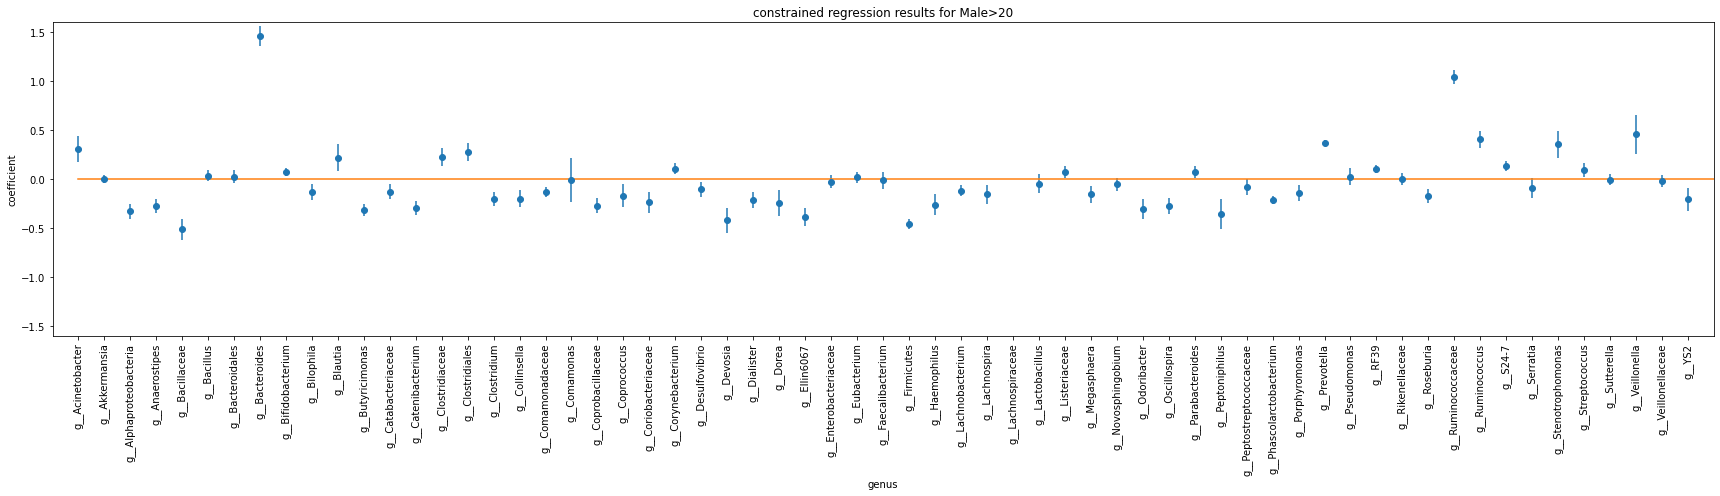

In [212]:

plt.figure(figsize=(24,7))
plt.errorbar(np.linspace(0,63,63),mean_results,yerr=std_resutls,fmt='o')
plt.xticks(np.linspace(0,63,63),g_OTUs_names,rotation=90)
plt.ylim(-1.6,1.6)
plt.xlim(-1,64)
plt.plot([0,64],[0,0])
plt.ylabel('coefficient')
plt.title('constrained regression results for Male>20')
plt.xlabel('genus')
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_constrained_male',dpi=500)

Computing regularization path using the Lars lasso...


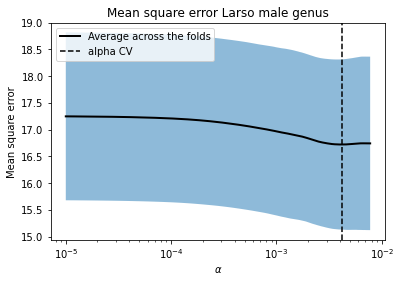

In [ ]:
# LassoLarsCV: least angle regression
EPSILON = 0.00001
# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=10,fit_intercept=True,max_iter=1000,eps=0.1).fit(X_train, y_train)
t_lasso_lars_cv = time.time() - t1

# Display results
plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)

plt.fill_between(model.cv_alphas_+ EPSILON, 
                 model.mse_path_.mean(axis=-1)-model.mse_path_.std(axis=-1), 
                 model.mse_path_.mean(axis=-1)+model.mse_path_.std(axis=-1), 
                 alpha=0.5)

plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error Larso male genus')
plt.axis('tight')
#plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_Mean_square_error_Larso_male')

In [ ]:
# regression results
lasso_select_name = []
print('coeffcient:\tselect varaican:')
for i in range(len(model.coef_)):
    if model.coef_[i] != 0:
        lasso_select_name.append(g_OTUs_names[i])
        print('%f\t%s'%(model.coef_[i], g_OTUs_names[i]))

coeffcient:	select varaican:
-0.023778	g__Pseudomonas
0.084472	g__Ruminococcus


In [ ]:
model.score(X_train,y_train)

0.0035323899691301897

In [ ]:
model.score(X_test,y_test)

-0.002108889630884292

In [ ]:
# MSE for training set
np.mean((model.predict(X_train)-y_train)*(model.predict(X_train)-y_train))

16.66702350656421

In [ ]:
# MSE for testing set
np.mean((model.predict(X_test)-y_test)*(model.predict(X_test)-y_test))

17.130632413234235

In [213]:
# this is for people>20s

tem_OTUs = select_OTUs_female[select_age_cat_female>=2]
tem_BMI = select_BMI_female[select_age_cat_female>=2]

X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_BMI, test_size=0.5, random_state=i)


In [214]:
tem_OTUs.shape

(3878, 63)

In [215]:
resutls = []

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(tem_OTUs, tem_BMI, test_size=0.3, random_state=i)
    res = minimize(obj, args=(y_train, X_train), x0=b_int,constraints=cons)
    resutls.append(res.x)

results = np.array(resutls)
results.shape

(10, 63)

In [216]:
mean_results

array([ 0.31126937,  0.00261433, -0.32878725, -0.27311267, -0.5130496 ,
        0.0364714 ,  0.02353824,  1.4622159 ,  0.07251352, -0.12912853,
        0.21931404, -0.3149728 , -0.12673635, -0.29315771,  0.229645  ,
        0.27811655, -0.20135153, -0.20040969, -0.13530353, -0.01280793,
       -0.27168582, -0.16917729, -0.23688876,  0.10726457, -0.10609766,
       -0.42177488, -0.21282596, -0.24755966, -0.38748719, -0.02552289,
        0.01699446, -0.0109298 , -0.45960527, -0.26028743, -0.11651025,
       -0.15523079,  1.84300144, -0.04751372,  0.07226712, -0.15575552,
       -0.05205521, -0.30928012, -0.27462896,  0.07139432, -0.35828848,
       -0.07672299, -0.21011356, -0.14009937,  0.3679018 ,  0.02361941,
        0.10512664, -0.00194355, -0.17398857,  1.03957874,  0.40791618,
        0.13192764, -0.08925697,  0.35542072,  0.09289966, -0.00534833,
        0.45757247, -0.01829387, -0.20489304])

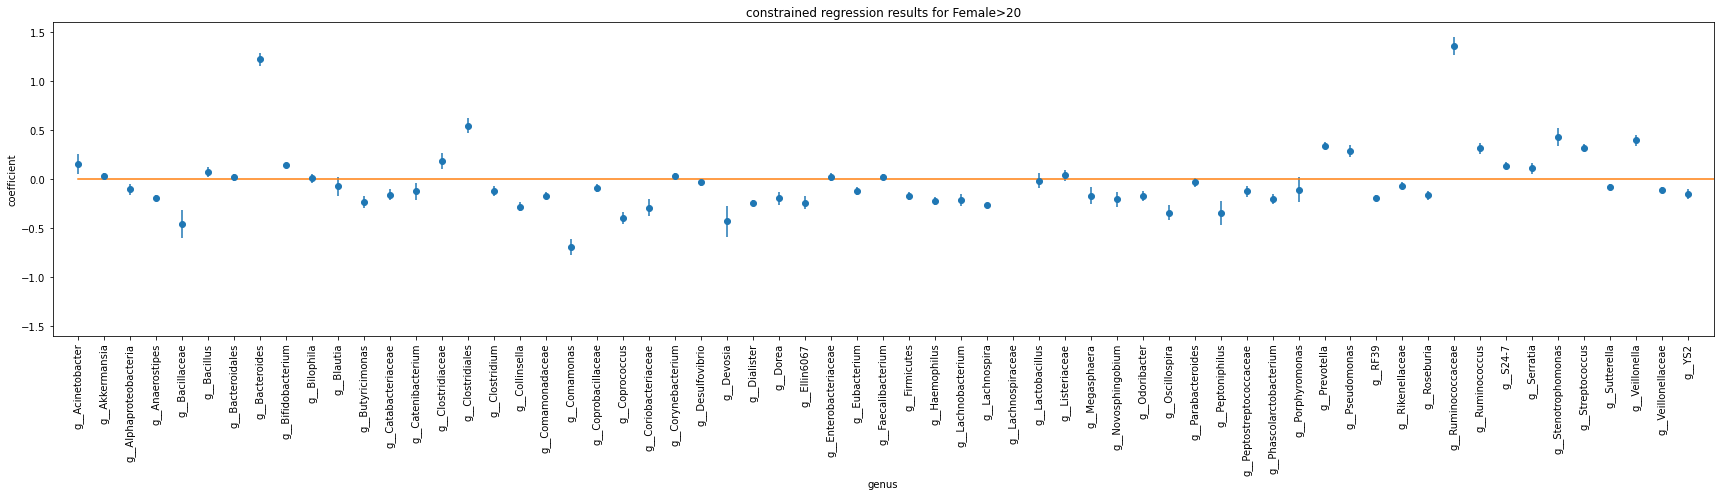

In [218]:
mean_results = np.mean(results,axis=0)
std_resutls = np.std(results,axis=0)


plt.figure(figsize=(24,7))
plt.errorbar(np.linspace(0,63,63),mean_results,yerr=std_resutls,fmt='o')
plt.xticks(np.linspace(0,63,63),g_OTUs_names,rotation=90)
plt.ylim(-1.6,1.6)
plt.xlim(-1,64)
plt.plot([0,64],[0,0])
plt.ylabel('coefficient')
plt.title('constrained regression results for Female>20')
plt.xlabel('genus')
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_constrained_female',dpi=500)

Computing regularization path using the Lars lasso...


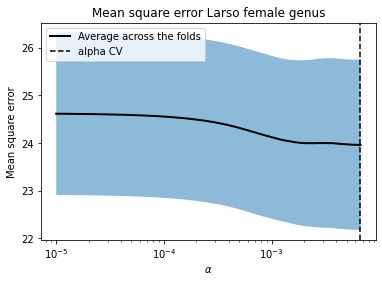

In [ ]:
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=10,fit_intercept=True,max_iter=1000,eps=0.1).fit(X_train, y_train)
t_lasso_lars_cv = time.time() - t1

# Display results
plt.figure()
#plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
#plt.errorbar(x=model.cv_alphas_+ EPSILON,
#                 y=model.mse_path_.mean(axis=-1),
#                 yerr=model.mse_path_.std(axis=-1))
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)

plt.fill_between(model.cv_alphas_+ EPSILON, 
                 model.mse_path_.mean(axis=-1)-model.mse_path_.std(axis=-1), 
                 model.mse_path_.mean(axis=-1)+model.mse_path_.std(axis=-1), 
                 alpha=0.5)

plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error Larso female genus')
plt.axis('tight')
#plt.ylim(0, 50)

plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_Mean_square_error_Larso_female')

In [ ]:
model.score(X_train,y_train)

0.0

In [ ]:
model.score(X_test,y_test)

-0.0014533466108055393

In [ ]:
# MSE for training set
np.mean((model.predict(X_train)-y_train)*(model.predict(X_train)-y_train))

23.957588659474144

In [ ]:
# MSE for testing set
np.mean((model.predict(X_test)-y_test)*(model.predict(X_test)-y_test))

27.353994718302285

In [ ]:
# regression results
lasso_select_name = []
print('coeffcient:\tselect varaican:')
for i in range(len(model.coef_)):
    if model.coef_[i] != 0:
        lasso_select_name.append(g_OTUs_names[i])
        print('%f\t%s'%(model.coef_[i], g_OTUs_names[i]))

coeffcient:	select varaican:


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

In [ ]:
select_OTUs_male = select_OTUs[select_sex==1]
select_OTUs_female = select_OTUs[select_sex==2]

select_age_cat_male = select_age_cat[select_sex==1]
select_age_cat_female = select_age_cat[select_sex==2]

select_BMI_male = select_BMI[select_sex==1]
select_BMI_female = select_BMI[select_sex==2]

for i in range(0,8):
    print(i, select_OTUs_male[select_age_cat_male==i,].shape)

print('female')
for i in range(0,8):
    print(i, select_OTUs_female[select_age_cat_female==i,].shape)

0 (160, 63)
1 (94, 63)
2 (274, 63)
3 (614, 63)
4 (650, 63)
5 (648, 63)
6 (646, 63)
7 (282, 63)
female
0 (111, 63)
1 (83, 63)
2 (337, 63)
3 (692, 63)
4 (815, 63)
5 (933, 63)
6 (858, 63)
7 (243, 63)


In [ ]:
tem_OTUs = select_OTUs_male[select_age_cat_male>=2]
tem_BMI = select_BMI_male[select_age_cat_male>=2]

In [ ]:
# scale for PCA

scaler = StandardScaler()
scaler.fit(tem_OTUs)
OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 10
pca = PCA(n_components=n_pc)
pca_mat = pca.fit_transform(OTUs_scale)    # project the original data into the PCA space

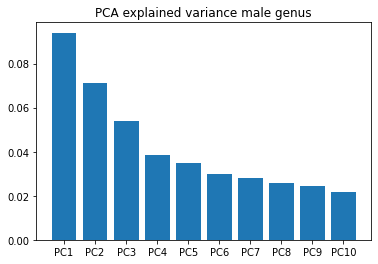

In [ ]:
# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(pca.explained_variance_ratio_)
plt.bar(x, height)
plt.title('PCA explained variance male genus')
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_variance_male',dpi=300)

In [ ]:
# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA genus")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = pca_mat[:,i]
            pcy = pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_male', dpi=300)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pca_mat_train, pca_mat_test, BMI_train, BMI_test = train_test_split(pca_mat, tem_BMI, test_size=0.3)

In [ ]:
n = len(pca_mat_train)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

C_list = [1e-3,1e-2,1e-1,1e0, 1e1,1e2,1e3]
gamma_list = [1e-3,1e-2,1e-1,1e0, 1e1, 1e2,1e3]
mse = []
mse_std = []

In [ ]:
for gamma in gamma_list:
    for C in C_list:
        score = -1*cross_val_score(SVR(kernel='rbf', gamma=gamma, C=C), pca_mat_train, BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
        mse_std.append(score.std())
        mse.append(score.mean()) 


In [ ]:
mse_std = np.array(mse_std).reshape(7,7)
mse  = np.array(mse).reshape(7,7)

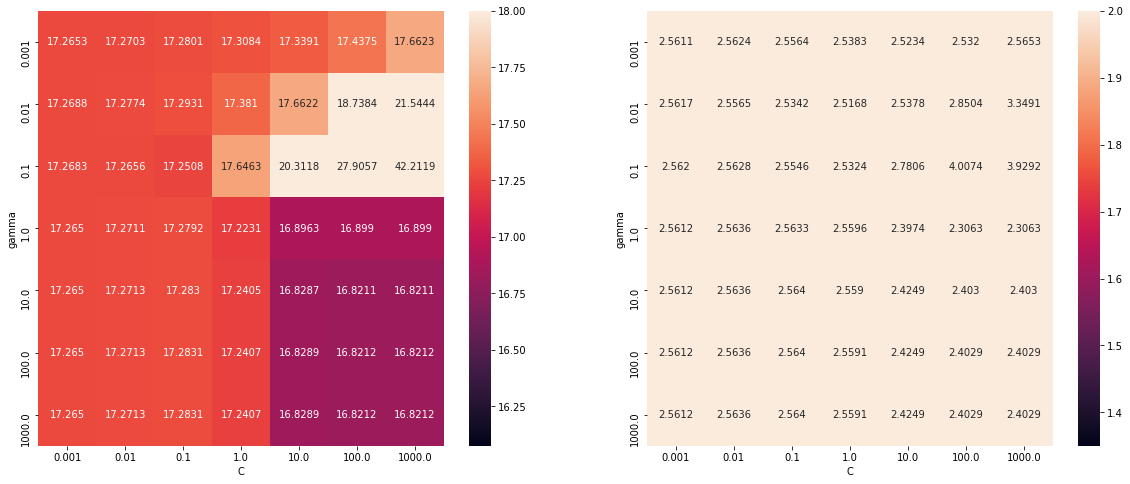

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

sns.heatmap(mse,annot=True,ax=ax[0],fmt='.6g',xticklabels=C_list,yticklabels=gamma_list,vmin=16.076,vmax=18)
sns.heatmap(mse_std,annot=True,ax=ax[1],fmt='.5g',xticklabels=C_list,yticklabels=gamma_list,vmin=1.35,vmax=2)

ax[0].set(xlabel='C',ylabel='gamma')
ax[1].set(xlabel='C',ylabel='gamma')

fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bmi_male_svm_pca',dpi=300)

In [ ]:
np.min(mse)

16.82109474915225

In [ ]:
svr_regression = SVR(kernel='rbf', gamma=10, C=100).fit(pca_mat_train, BMI_train)

In [ ]:
np.mean((svr_regression.predict(pca_mat_test)-BMI_test)*(svr_regression.predict(pca_mat_test)-BMI_test))

16.937923683553013

In [ ]:
np.mean((svr_regression.predict(pca_mat_train)-BMI_train)*(svr_regression.predict(pca_mat_train)-BMI_train))

0.009746005995696527

In [ ]:
n = len(pca_mat_train)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

alpha_list = [1e-3,1e-2,1e-2*2.5,1e-2*5, 1e-2*7.5,1e-1,1e0]
mse = []
mse_std = []

In [ ]:
pca_mat_train.shape

(2179, 10)

In [ ]:
for alpha in alpha_list:
    score = -1*cross_val_score(KernelRidge(kernel='rbf', alpha=alpha), pca_mat_train, BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
    mse_std.append(score.std())
    mse.append(score.mean()) 


In [ ]:
mse_std

[7.507764675669505,
 6.881688650320222,
 6.592038875317199,
 6.40521207227093,
 6.3272204302847825,
 6.29311792489419,
 7.107465525923061]

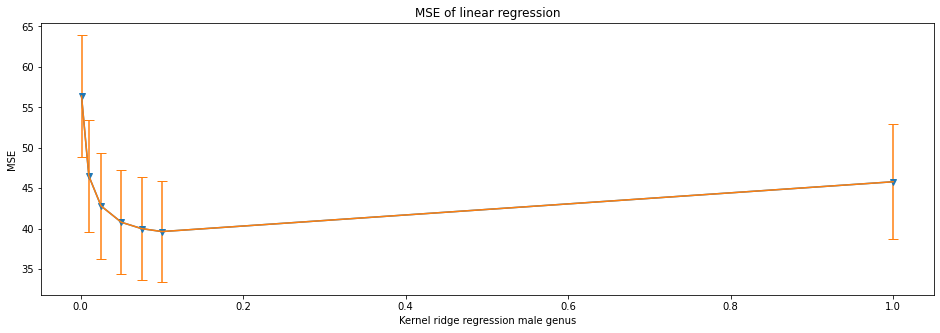

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,5))
ax.plot(alpha_list,mse, '-v')
ax.errorbar(x=alpha_list,
             y=mse,
             yerr=mse_std,
             capsize=5)
ax.set_xlabel('Kernel ridge regression')
ax.set_ylabel('MSE')
ax.set_title('MSE of linear regression male genus')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bmi_male_kernelridge_pca',dpi=300)

In [ ]:
# this is for female
tem_OTUs = select_OTUs_female[select_age_cat_female>=2]
tem_BMI = select_BMI_female[select_age_cat_female>=2]

In [ ]:
# scale for PCA

scaler = StandardScaler()
scaler.fit(tem_OTUs)
OTUs_scale = scaler.transform(tem_OTUs)    # scaled otu matrix

# PCA
n_pc = 10
pca = PCA(n_components=n_pc)
pca_mat = pca.fit_transform(OTUs_scale)    # project the original data into the PCA space

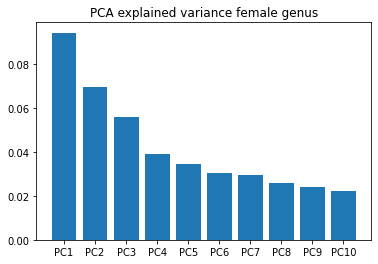

In [ ]:
# Scree plot
x = [f'PC{i+1}' for i in range(n_pc)]
height = list(pca.explained_variance_ratio_)
plt.bar(x, height)
plt.title('PCA explained variance female genus')
plt.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_variance_female',dpi=300)

In [ ]:
# pair-wise pca

fig, ax = plt.subplots(ncols=n_pc, nrows=n_pc, constrained_layout=True, figsize=(28, 28))
fig.suptitle("pair-wised PCA genus")
for i in range(n_pc):
    for j in range(n_pc):
        if i == j:
            ax[i,j].text(0.45, 0.05, f'PC{i+1}')
            ax[i,j].text(0.05, 0.45, f'Other PCs', rotation=90)
        else:
            pcx = pca_mat[:,i]
            pcy = pca_mat[:,j]
            scalex = 1.0/(pcx.max() - pcx.min())
            scaley = 1.0/(pcy.max() - pcy.min())
            ax[i,j].scatter(pcx * scalex, pcy * scaley, alpha=0.1, color='black')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_PCA_female', dpi=300)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pca_mat_train, pca_mat_test, BMI_train, BMI_test = train_test_split(pca_mat, tem_BMI, test_size=0.3)

In [ ]:
n = len(pca_mat_train)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

C_list = [1e-3,1e-2,1e-1,1e0, 1e1,1e2,1e3]
gamma_list = [1e-3,1e-2,1e-1,1e0, 1e1, 1e2,1e3]
mse = []
mse_std = []

In [ ]:
for gamma in gamma_list:
    for C in C_list:
        score = -1*cross_val_score(SVR(kernel='rbf', gamma=gamma, C=C), pca_mat_train, BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
        mse_std.append(score.std())
        mse.append(score.mean()) 


In [ ]:
mse_std = np.array(mse_std).reshape(7,7)
mse  = np.array(mse).reshape(7,7)

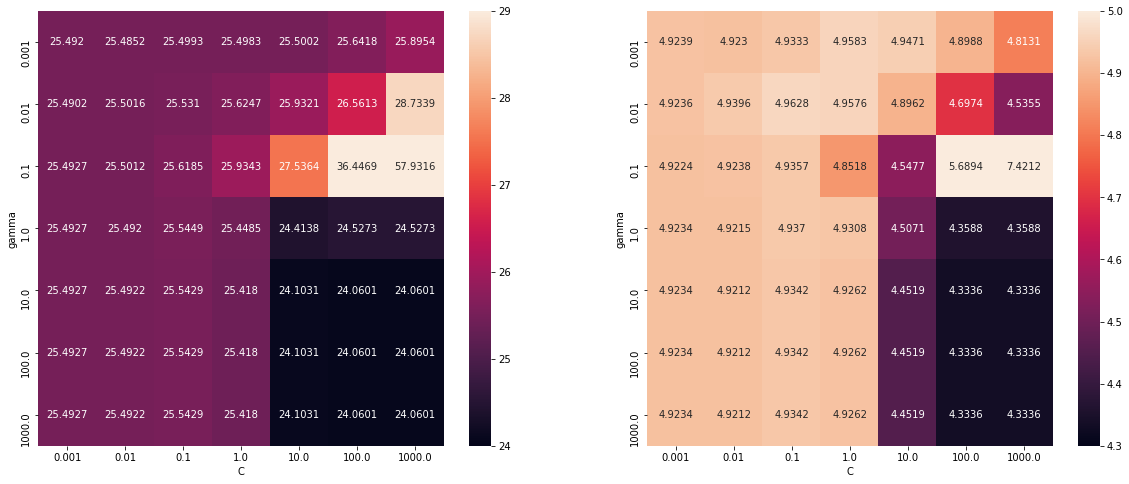

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

sns.heatmap(mse,annot=True,ax=ax[0],fmt='.6g',xticklabels=C_list,yticklabels=gamma_list,vmin=24,vmax=29)
sns.heatmap(mse_std,annot=True,ax=ax[1],fmt='.5g',xticklabels=C_list,yticklabels=gamma_list,vmin=4.3,vmax=5)

ax[0].set(xlabel='C',ylabel='gamma')
ax[1].set(xlabel='C',ylabel='gamma')

fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bmi_female_svm_pca',dpi=300)

In [ ]:
mse

array([[25.49203583, 25.48524508, 25.4992658 , 25.49828863, 25.5001751 ,
        25.64183158, 25.89535989],
       [25.49020905, 25.50160046, 25.53098534, 25.62466428, 25.9320772 ,
        26.56130508, 28.73390713],
       [25.49266979, 25.50117304, 25.61852625, 25.93425381, 27.53639317,
        36.44694239, 57.93155711],
       [25.49265072, 25.49200439, 25.54490969, 25.44848747, 24.41381681,
        24.52730253, 24.52730253],
       [25.49266337, 25.492188  , 25.54287135, 25.41803655, 24.10313765,
        24.06008645, 24.06008645],
       [25.49266337, 25.492188  , 25.5428737 , 25.41803434, 24.1031139 ,
        24.06006142, 24.06006142],
       [25.49266337, 25.492188  , 25.5428737 , 25.41803434, 24.1031139 ,
        24.06006142, 24.06006142]])

In [ ]:
np.min(mse)

24.06006141988758

In [ ]:
svr_regression = SVR(kernel='rbf', gamma=100, C=100).fit(pca_mat_train, BMI_train)

In [ ]:
np.mean((svr_regression.predict(pca_mat_test)-BMI_test)*(svr_regression.predict(pca_mat_test)-BMI_test))

27.160062256493237

In [ ]:
np.mean((svr_regression.predict(pca_mat_train)-BMI_train)*(svr_regression.predict(pca_mat_train)-BMI_train))

0.009877276485324969

In [ ]:
n = len(pca_mat_train)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=2)

alpha_list = [1e-3,1e-2,1e-2*2.5,1e-2*5, 1e-2*7.5,1e-1,1e0]
mse = []
mse_std = []

In [ ]:
for alpha in alpha_list:
    score = -1*cross_val_score(KernelRidge(kernel='rbf', alpha=alpha), pca_mat_train, BMI_train, cv=kf_10, scoring='neg_mean_squared_error')
    mse_std.append(score.std())
    mse.append(score.mean()) 


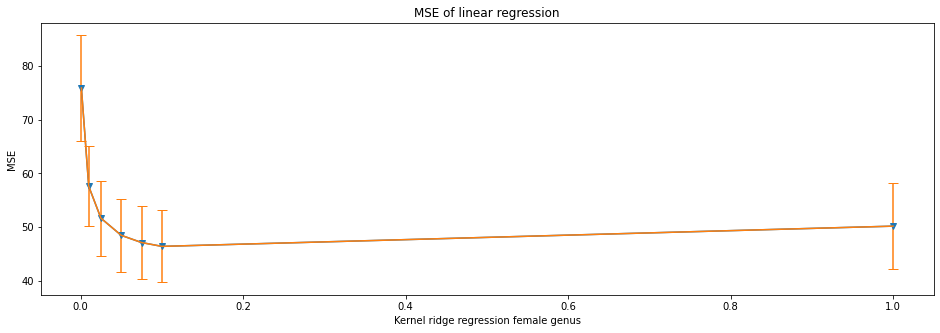

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,5))
ax.plot(alpha_list,mse, '-v')
ax.errorbar(x=alpha_list,
             y=mse,
             yerr=mse_std,
             capsize=5)
ax.set_xlabel('Kernel ridge regression female genus')
ax.set_ylabel('MSE')
ax.set_title('MSE of linear regression')
fig.savefig('/content/drive/MyDrive/class/STAT542/project/zewei/g_bmi_female_kernelridge_pca',dpi=300)